In [95]:
from csv import DictReader
import numpy as np
import chardet
import matplotlib
from scipy import stats
import collections
from datetime import datetime

import matplotlib.pyplot as plt

In [97]:
# Vnos podatkov
reader = DictReader(open('data/pn2019.csv','rt', encoding='Windows-1252'),delimiter=';')
podatki19 = np.array([[row['KlasifikacijaNesrece'], row['VrednostAlkotesta'], row['VozniskiStazVLetih'], row['UraPN'], row['DatumPN']] for row in reader])

In [100]:
# popravki podatkov
# popravljaje alkotest vrednosti
for i in range(len(podatki19)):
    podatki19[i][1] = float(podatki19[i][1].replace(',','.'))
    
# dobimo samo uro
ure = [[ura.split(".")[0]] for ura in podatki19[:, 3]]
podatki19 = np.append(podatki19, ure, axis=1)

datetimes = []
for row in podatki19:
    ura, minute = row[3].split(".")
    dan, mesec, leto = row[4].split(".")
    
    datetimes.append([datetime(int(leto), int(mesec), int(dan), int(ura), int(minute))])
    
podatki19 = np.append(podatki19, datetimes, axis=1)
    

# dodajanje dnevov iz datuma
dnevi = [[datetime.strptime(d, "%d.%m.%Y").strftime('%A')] for d in podatki19[:, 4]]

podatki19 = np.append(podatki19, dnevi, axis=1)

In [101]:
podatki19

array([['Z LAŽJO TELESNO POŠKODBO', 0.18, '0', ..., '13',
        datetime.datetime(2019, 1, 8, 13, 15), 'Tuesday'],
       ['Z LAŽJO TELESNO POŠKODBO', 0.0, '0', ..., '13',
        datetime.datetime(2019, 1, 8, 13, 15), 'Tuesday'],
       ['Z LAŽJO TELESNO POŠKODBO', 0.2, '29', ..., '05',
        datetime.datetime(2019, 1, 2, 5, 55), 'Wednesday'],
       ...,
       ['Z LAŽJO TELESNO POŠKODBO', 0.0, '03', ..., '09',
        datetime.datetime(2019, 8, 25, 9, 0), 'Sunday'],
       ['Z LAŽJO TELESNO POŠKODBO', 0.0, '0', ..., '09',
        datetime.datetime(2019, 8, 25, 9, 0), 'Sunday'],
       ['Z LAŽJO TELESNO POŠKODBO', 0.0, '37', ..., '09',
        datetime.datetime(2019, 8, 25, 9, 0), 'Sunday']], dtype=object)

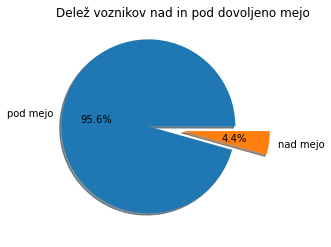

In [83]:
# Delez voznikov pod, nad dovoljeno mejo
alkotest = np.array([float(value) for value in podatki19[:,1]])
meja = 0.24

podMeja = alkotest[alkotest[:] < meja]
nadMeja = alkotest[alkotest[:] >= meja]

# Delež voznikov, ki so napihali nad dovoljeno mejo je le 4.4%
len(nadMeja) / len(alkotest)

labels = 'pod mejo', 'nad mejo'
sizes = [len(podMeja), len(nadMeja)]

plt.title("Delež voznikov nad in pod dovoljeno mejo")
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=(0.4,0))
plt.show()

In [84]:
# Nesrece ponoci 23h -> 4h
nesrece_ponoci = podatki19[(podatki19[:, 3].astype(int) < 5) | (podatki19[:, 3].astype(int) > 22)]
#nesrece_podnevi = podatki19[(podatki19[:, 3].astype(int) >= 5) | (podatki19[:, 3].astype(int) <= 22)]

In [85]:
# Delez nesrec ponoci
len(nesrece_ponoci) / len(podatki19)

0.05114018910453441

In [86]:
# Delez prekomerno vinjenih ponoci
alkotestPonoci = np.array([float(value) for value in podatki19[:,1]])
nadMejaPonoci = alkotestPonoci[alkotestPonoci[:] >= meja]
len(nadMejaPonoci) / len(nesrece_ponoci)
# vecina nesrece ponoci nad mejo

0.8534630795649685

In [55]:
# Povprecna vinjenosti pred in po koroni
sum(alkotest) / len(alkotest)

0.03131494979655157

Ponedeljek 0.02176056338028169
Torek 0.022250409165302795
Sreda 0.02541468064823643
Cetrtek 0.02175289575289576
Petek 0.034535616217089345
Sobota 0.05348583877995643
Nedelja 0.05346050870147257


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

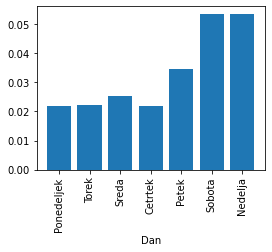

In [87]:
# Kolicina popitega skozi teden
labels = "Ponedeljek", "Torek", "Sreda", "Cetrtek", "Petek", "Sobota", "Nedelja"

ponedeljek = podatki19[podatki19[:, 5] == "Monday", 1]
torek = podatki19[podatki19[:, 5] == "Tuesday", 1]
sreda = podatki19[podatki19[:, 5] == "Wednesday", 1]
cetrtek = podatki19[podatki19[:, 5] == "Thursday", 1]
petek = podatki19[podatki19[:, 5] == "Friday", 1]
sobota = podatki19[podatki19[:, 5] == "Saturday", 1]
nedelja = podatki19[podatki19[:, 5] == "Sunday", 1]

avg_ponedeljek = sum(ponedeljek.astype(float)) / len(ponedeljek)
avg_torek = sum(torek.astype(float)) / len(torek)
avg_sreda = sum(sreda.astype(float)) / len(sreda)
avg_cetrtek = sum(cetrtek.astype(float)) / len(cetrtek)
avg_petek = sum(petek.astype(float)) / len(petek)
avg_sobota = sum(sobota.astype(float)) / len(sobota)
avg_nedelja = sum(nedelja.astype(float)) / len(nedelja)

x = [avg_ponedeljek, avg_torek, avg_sreda, avg_cetrtek, avg_petek, avg_sobota, avg_nedelja]

print("Ponedeljek", avg_ponedeljek)
print("Torek", avg_torek)
print("Sreda", avg_sreda)
print("Cetrtek", avg_cetrtek)
print("Petek", avg_petek)
print("Sobota", avg_sobota)
print("Nedelja", avg_nedelja)

plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.bar(labels, x)
plt.xlabel("Dan")
plt.xticks(rotation=90)

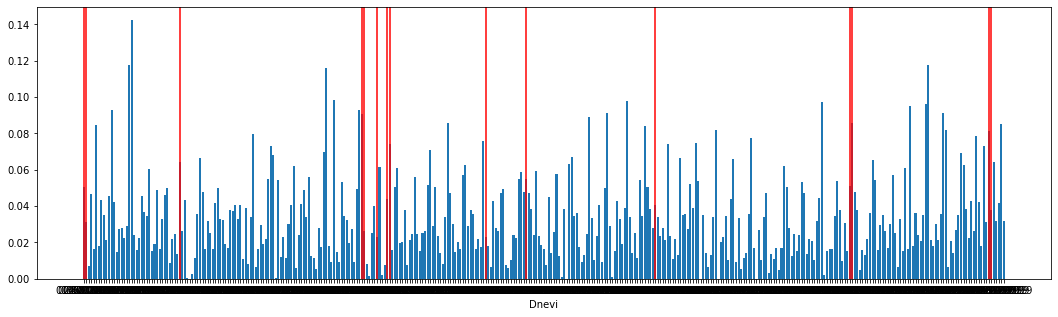

In [124]:
# Kolicina popitega po dela prostem prazniku
sorted_podatki19 = podatki19[np.argsort(podatki19[:, 7])]

sorted_podatki19_dict = dict()
for row in sorted_podatki19:
    datum = row[4]
    
    if datum not in sorted_podatki19_dict:
        rez = sorted_podatki19[sorted_podatki19[:, 4] == datum, 1]
        sorted_podatki19_dict[datum] = sum(rez.astype(float)) / len(rez)
        
labels = list(sorted_podatki19_dict.keys())
x = list(sorted_podatki19_dict.values())

dela_prosti_dnevi2019 = ["01.01.2019", "02.01.2019", "08.02.2019", "21.04.2019", "22.04.2019", "27.04.2019", 
                     "01.05.2019", "02.05.2019", "09.06.2019", "25.06.2019", "15.08.2019", "31.10.2019",
                    "01.11.2019", "25.12.2019", "26.12.2019"]

plt.figure(figsize=(40, 5))
plt.subplot(1, 2, 1)
plt.bar(labels, x)
plt.xlabel("Dnevi")

for d in dela_prosti_dnevi2019:
    plt.axvline(x=d, color='r', label=d)

In [135]:
print("02.01.2019", sorted_podatki19_dict["02.01.2019"])
print("03.01.2019", sorted_podatki19_dict["03.01.2019"])
print("Razlika:", sorted_podatki19_dict["03.01.2019"] - sorted_podatki19_dict["02.01.2019"])
print("----------------")

print("08.02.2019", sorted_podatki19_dict["08.02.2019"])
print("09.02.2019", sorted_podatki19_dict["09.02.2019"])
print("Razlika:", sorted_podatki19_dict["09.02.2019"] - sorted_podatki19_dict["08.02.2019"])
print("----------------")

print("21.04.2019", sorted_podatki19_dict["21.04.2019"])
print("22.04.2019", sorted_podatki19_dict["22.04.2019"])
print("Razlika:", sorted_podatki19_dict["22.04.2019"] - sorted_podatki19_dict["21.04.2019"])
print("----------------")

print("27.04.2019", sorted_podatki19_dict["27.04.2019"])
print("28.04.2019", sorted_podatki19_dict["28.04.2019"])
print("Razlika:", sorted_podatki19_dict["28.04.2019"] - sorted_podatki19_dict["27.04.2019"])
print("----------------")

print("02.05.2019", sorted_podatki19_dict["02.05.2019"])
print("03.05.2019", sorted_podatki19_dict["03.05.2019"])
print("Razlika:", sorted_podatki19_dict["03.05.2019"] - sorted_podatki19_dict["02.05.2019"])
print("----------------")

02.01.2019 0.03125
03.01.2019 0.00676923076923077
Razlika: -0.02448076923076923
----------------
08.02.2019 0.06426229508196721
09.02.2019 0.026515151515151516
Razlika: -0.03774714356681569
----------------
21.04.2019 0.09046153846153845
22.04.2019 0.026385542168674697
Razlika: -0.06407599629286376
----------------
27.04.2019 0.022794117647058826
28.04.2019 0.061290322580645165
Razlika: 0.03849620493358634
----------------
02.05.2019 0.07400000000000001
03.05.2019 0.01574074074074074
Razlika: -0.058259259259259275
----------------


In [151]:
# Nesrece po urah
podatki19[:, 5]
ura_avg_dict = dict()
ura_sum_dict = dict()

for row in podatki19:
    ura = row[5]
    rez = podatki19[podatki19[:, 5] == ura, 1].astype(float)
    if ura not in ura_avg_dict:
        ura_avg_dict[ura] = sum(rez) / len(rez)
        ura_sum_dict[ura] = len(rez)

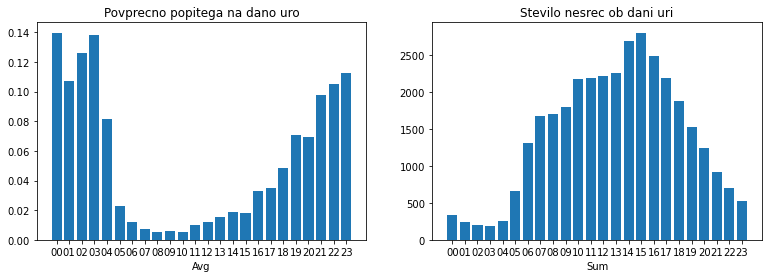

In [168]:
ura_avg_dict = dict(sorted(ura_avg_dict.items()))

ura_sum_dict = dict(sorted(ura_sum_dict.items()))

labelsAvg = list(ura_avg_dict.keys())
xAvg = list(ura_avg_dict.values())

labelsSum = list(ura_sum_dict.keys())
xSum = list(ura_sum_dict.values())

figure, axis = plt.subplots(1, 2, figsize=(13, 4))
  
axis[0].bar(labelsAvg, xAvg)
axis[0].set_title("Povprecno popitega na dano uro")
axis[0].set_xlabel("Avg")
  
axis[1].bar(labelsSum, xSum)
axis[1].set_title("Stevilo nesrec ob dani uri")
axis[1].set_xlabel("Sum")

plt.show()